In [16]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys

In [17]:
import torch
import torchvision

In [18]:
%load_ext autoreload
%autoreload 2
sys.path.append("..")
from dc_bit.data_loader import create_data_loader, LoaderParams, from_pytorch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
path_to_data = Path("/Users/aleksandrafront/Library/Mobile Documents/com~apple~CloudDocs/Music Notes Dataset")

In [32]:
params = LoaderParams(
    path_to_data=path_to_data / 'train',
    batch_size=4,
    n_workers=4,
    shuffle=True,
    augment=False
)

In [33]:
data_loader = create_data_loader(params)

In [34]:
data_loader.dataset.classes

['bemol',
 'dot',
 'eight',
 'half',
 'natural',
 'quarter',
 'restEight',
 'restHalf',
 'restQuarter',
 'restSixteenth',
 'restWhole',
 'sharp',
 'sixteenth',
 'whole']

In [35]:
for el in data_loader:
    print(type(el))
    break

<class 'list'>


In [36]:
len(el)

2

In [37]:
type(el[0])

torch.Tensor

In [38]:
el[0].shape

torch.Size([4, 3, 224, 224])

In [39]:
el[1]

tensor([3, 5, 1, 3])

In [40]:
def display_image(img, label):
    print(label)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.show()

def iterate_data_loader(n_elem=1):
    count = 0
    for batch in data_loader:
        imgs, codes = batch
        for img, code in zip(imgs, codes):
            label = data_loader.dataset.classes[code]
            img = from_pytorch(img)
            display_image(img, label)
            count += 1
            if count >= n_elem:
                return

half


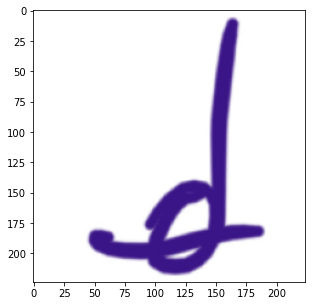

natural


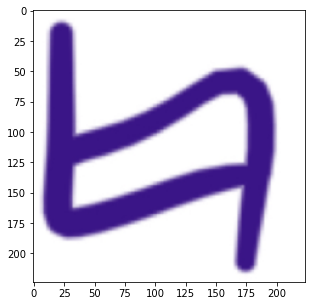

half


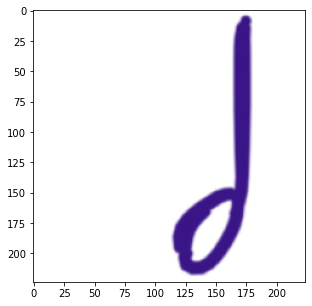

restSixteenth


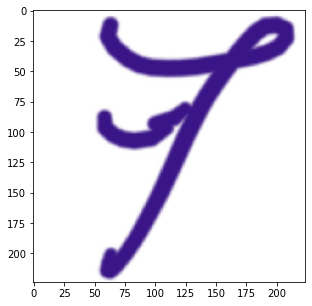

restSixteenth


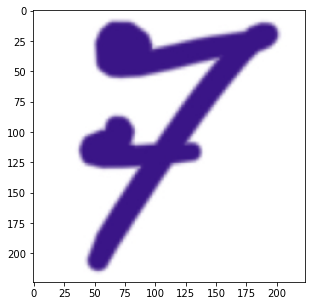

eight


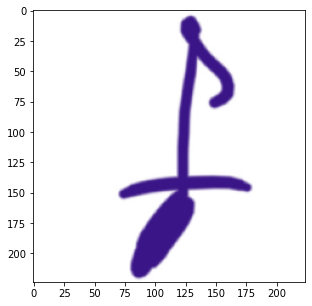

half


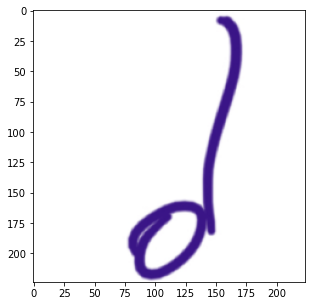

quarter


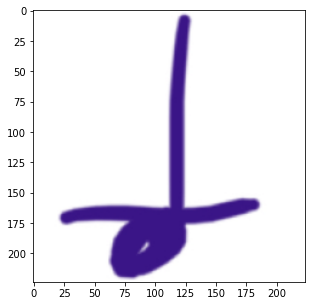

restSixteenth


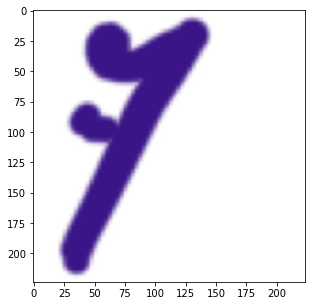

natural


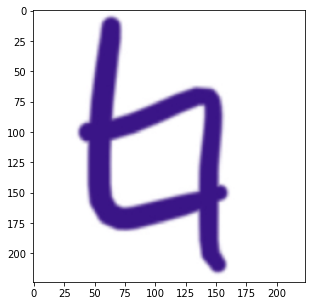

bemol


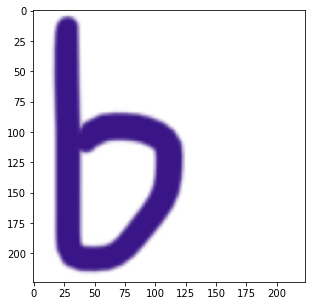

eight


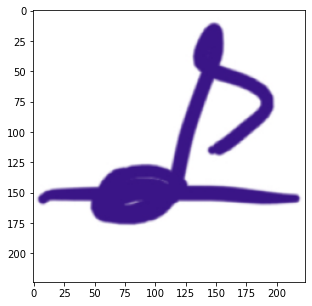

natural


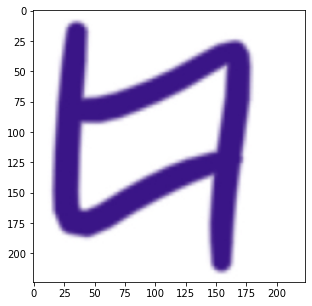

quarter


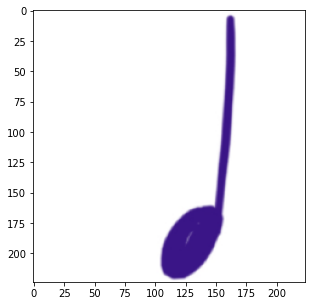

restQuarter


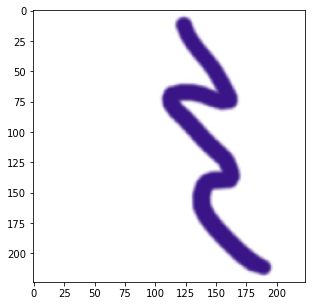

bemol


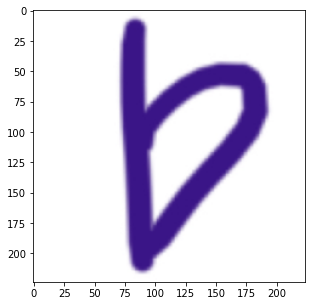

bemol


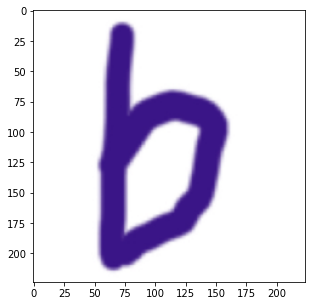

quarter


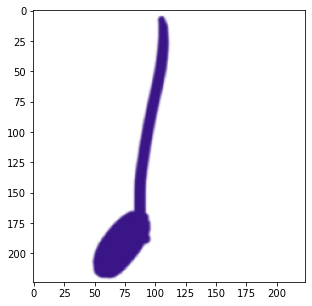

restSixteenth


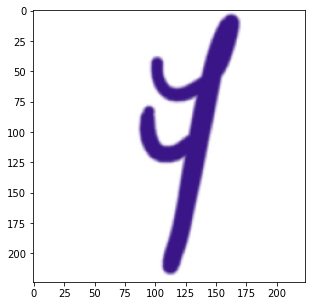

half


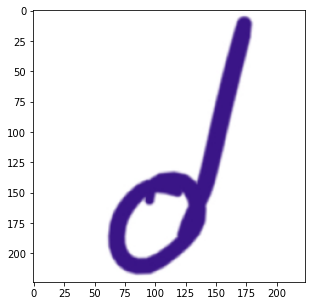

In [41]:
iterate_data_loader(20)